# 크기 불변 특징점 검출
이미지의 크기가 달라지더라도 지속적으로 검출되는 특징을 찾는 것.

## SIFT(Scale invariant Feature Transform) 알고리즘
- 크기 불변 특징점 검출의 대표적인 알고리즘
- 영상 크기 변화와 무관하게 특징점 추출

### 과정
1. 스케일 스페이스(Scale Space) 생성
    1. 이미지를 반으로 축소시킨 이미지를 반복해서 만듦  
        <img src="https://t1.daumcdn.net/cfile/tistory/2325114F5926EDE43B" width="30%" height="30%">  
    2. 이미지 피라미드의 각 층 이미지(Octave image)를 점점 강하게 가우시안 블러를 적용시켜 이미지 생성
        - 가우시안 필터 적용 식  
            <img src="https://t1.daumcdn.net/cfile/tistory/99FADB3359CE1A8016" width="20%" height="20%" style="background-color:white;">  
        - 시그마: 블러링 정도를 결정하는 파라미터(스케일 파라미터)
2. DoG(Difference of Gaussian) 연산  
    <img src="https://t1.daumcdn.net/cfile/tistory/2766C44559263BD526" width="40%" height="40%">  
    - 스케일 스페이스에서 같은 옥타브 내 서로 다른 두개의 가우시안 블러 이미지를 빼기 연산을 통해 생성
3. 키포인트 찾기
    - 스케일 불변성을 충족시키기 위한 작업.  
    <img src="https://t1.daumcdn.net/cfile/tistory/256E083B5926919F15" width="40%" height="40%">  
    - DoG 이미지들 내에서 극값의 대략적인 위치 찾기
    - 동일한 옥타브 내에 세 장의 DoG 이미지 사용.
    - 지금 체크할 픽셀 주변의 8개 픽셀, 한단계씩 위아래 DoG 이미지에서 체크하려고 하는 픽셀과 가까운 9개씩, 총 26개 픽셀 검사. 이 26개 중 가장 작거나 크면 극값으로 인정
4. 키포인트들에 방향 할당
    - 회전 불변성을 충족시키기 위한 작업.
    1. 키포인트 주변에 윈도우 생성  
    <img src="https://t1.daumcdn.net/cfile/tistory/275BD03B5929292918" width="20%" height="20%"> 
    2. 공식을 통해 모든 픽셀들의 그라디언트 방향과 크기 구함  
    <img src="https://t1.daumcdn.net/cfile/tistory/210BD43859292A631E" width="20%" height="20%"> 
    3. 키포인트와 가까울수록 더 큰 값을 갖도록 가중치를 줌  
    <img src="https://t1.daumcdn.net/cfile/tistory/2703FA4959292C2514" width="20%" height="20%"> 
    4. 윈도우 내 모든 픽셀에서 구한 각도를 360도를 10도 단위로 잘라 히스토그램으로 만듦  
    <img src="https://t1.daumcdn.net/cfile/tistory/2271244059292F8327" width="20%" height="20%"> 
5. SIFT 특징 산출
    - 앞에서 구한 키포인트들을 이용하여 각 픽셀에 지문 부여
    1. 키포인트 주변을 16개의 4x4 윈도우로 구성
    2. 전 단계와 비슷하게 픽셀들의 그라디언트 크기와 방향 구함
    3. 구한 방향을 8개로 나누어 히스토그램을 얻음. 16개 모두 얻고 16x8=128개의 숫자 구함 -> 키포인트 지문
    4. 구한 카포인트 방향에 그라디언트 방향을 빼 특징 추출
------
# OpenCV 구현

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [4]:
img1 = cv2.imread('./img/sift.jpg')
img2 = cv2.imread('./img/sift2.jpg')

## cv2.xfeatures2d.SIFT_create(nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma)
- nfeatures: 검출 최대 특징 수
- nOctaveLayers: 이미지 피라미드에 사용할 계층 수
- ontrastThreshold: 필터링할 빈약한 특징 문턱 값
- edgeThreshold: 필터링할 엣지 문턱 값
- sigma: 이미지 피라미드 0 계층에서 사용할 가우시안 필터의 시그마 값

In [3]:
sift = cv2.xfeatures2d.SIFT_create()

## detector.detectAndCompute(image, mask, decriptors, useProvidedKeypoints) - 특징점 검출과 계산 한번에 수행
- image: 입력 이미지
- keypoints: 디스크립터 계산을 위해 사용할 특징점
- descriptors(optional): 계산된 디스크립터
- mask(optional): 특징점 검출에 사용할 마스크
- useProvidedKeypoints(optional): True인 경우 특징점 검출을 수행하지 않음

In [5]:
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

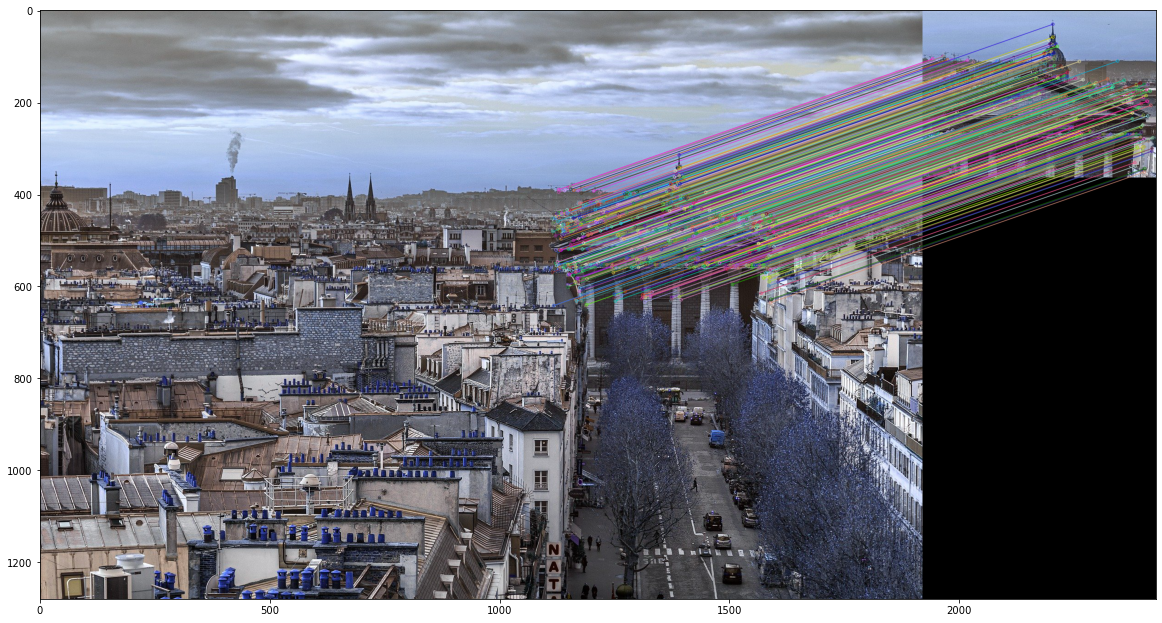

In [13]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append([m])
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.figure(figsize=(20,20))
plt.imshow(img3)
plt.savefig('./img/sift_reault.png')
plt.show()